In [19]:
# ==========================================
# Real Estate Data Analysis (2000-2025)
# Assignment: Data Survey & Inconsistency Detection
# ==========================================

import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# Step 1: Load datasets
# -----------------------------
base_path = r"C:\Users\Adewale Sam\Desktop\DATA3960 - Data Analytics Capstone"

active_df = pd.read_csv(f"{base_path}\\RealEstateDataJanuary2026-Data3960-Active.csv",
                        encoding='cp1252', low_memory=False)
sold_df = pd.read_csv(f"{base_path}\\RealEstateDataJanuary2026-Data3960-sold.csv",
                      encoding='cp1252', low_memory=False)

print("✅ Datasets loaded successfully.\n")
print(f"Active listings shape: {active_df.shape} (rows, columns)")
print(f"Sold listings shape: {sold_df.shape} (rows, columns)")
print("Explanation: This shows how many rows (properties) and columns (fields) each dataset has.\n")


✅ Datasets loaded successfully.

Active listings shape: (705506, 45) (rows, columns)
Sold listings shape: (515122, 48) (rows, columns)
Explanation: This shows how many rows (properties) and columns (fields) each dataset has.



In [20]:
# -----------------------------
# Step 2: Data Dictionary (Pipeline)
# -----------------------------
def create_data_dictionary(df, name):
    print(f"Data Dictionary for {name} Listings:")
    data_dict = pd.DataFrame({
        "Column": df.columns,
        "Data Type": df.dtypes,
        "Missing Values": df.isnull().sum(),
        "Unique Values": df.nunique()
    })
    print(data_dict)
    print("\nExplanation: Each column's type, number of missing values, and unique values are shown. This helps understand the dataset structure and identify fields needing attention.\n")
    return data_dict

active_dict = create_data_dictionary(active_df, "Active")
sold_dict = create_data_dictionary(sold_df, "Sold")


Data Dictionary for Active Listings:
                                                    Column Data Type  \
Linc #                                              Linc #   float64   
Prop Class                                      Prop Class    object   
Area/City                                        Area/City    object   
Community                                        Community    object   
Address                                            Address    object   
Status                                              Status    object   
List Price                                      List Price     int64   
Postal Code                                    Postal Code    object   
Sold Date                                        Sold Date    object   
Sold Price                                      Sold Price     int64   
Listing ID #                                  Listing ID #    object   
DOM                                                    DOM     int64   
FlrArea SF                 

In [21]:
print("Calling postal code check...")


Calling postal code check...


In [22]:
# -----------------------------
# Step 3: Postal Code Issues
# -----------------------------
# Objective:
# Identify listings with missing or incorrectly formatted Canadian postal codes.
# Canadian postal codes follow the pattern: A1A 1A1 (letter-digit-letter space digit-letter-digit)

import re

def check_postal_code(df, name):
    """
    Adds a 'Postal Code_issue' column to the dataframe.
    Flags True if postal code is missing or does not match Canadian postal code format.
    Prints the number of issues and 5 sample records.
    """
    df = df.copy()  # avoid modifying original dataframe directly

    def is_invalid(pc):
        if pd.isnull(pc):
            return True
        pc = str(pc).strip().upper()
        pattern = r'^[A-Z]\d[A-Z]\s?\d[A-Z]\d$'  # Canadian postal code regex
        return not bool(re.match(pattern, pc))

    # Apply validation
    df['Postal Code_issue'] = df['Postal Code'].apply(is_invalid)

    # Count issues
    issues_count = df['Postal Code_issue'].sum()
    print(f"{name} listings with postal code issues: {issues_count}")
    print("Explanation: Flags missing or improperly formatted Canadian postal codes (expected format: A1A 1A1).\n")

    # Show 5 examples
    print(df[df['Postal Code_issue']][['Address', 'Postal Code']].head())
    print("Explanation: Sample records with invalid or missing postal codes.\n")

    return df

# Run the postal code check for both datasets
active_df = check_postal_code(active_df, "Active")
sold_df = check_postal_code(sold_df, "Sold")


Active listings with postal code issues: 2
Explanation: Flags missing or improperly formatted Canadian postal codes (expected format: A1A 1A1).

                         Address Postal Code
173983           8028 132 Avenue         NaN
418798  226 1820_RUTHERFORD Road         NaN
Explanation: Sample records with invalid or missing postal codes.

Sold listings with postal code issues: 26979
Explanation: Flags missing or improperly formatted Canadian postal codes (expected format: A1A 1A1).

                             Address Postal Code
46                      216 2 Street         NaN
48   0 W4TH, 26,57,05,SW Not Applic.         NaN
86                  0 NA Not Applic.         NaN
114                   5310 51 Avenue         NaN
116                   5039 52 Street         NaN
Explanation: Sample records with invalid or missing postal codes.



In [23]:
# -----------------------------
# Step 4: List Price Issues
# -----------------------------
def check_price(df, name):
    invalid_price = df[df['List Price'] <= 0]
    print(f"{name} listings with zero or negative price: {len(invalid_price)}")
    print("Explanation: Prices should be positive. Zero or negative prices indicate errors in the dataset.\n")
    # Show 5 examples
    if not invalid_price.empty:
        print(invalid_price[['Address','List Price']].head())
        print("Explanation: These are examples of invalid prices that would need cleaning.\n")
    return invalid_price

invalid_price_active = check_price(active_df, "Active")
invalid_price_sold = check_price(sold_df, "Sold")


Active listings with zero or negative price: 0
Explanation: Prices should be positive. Zero or negative prices indicate errors in the dataset.

Sold listings with zero or negative price: 0
Explanation: Prices should be positive. Zero or negative prices indicate errors in the dataset.



In [24]:
# -----------------------------
# Step 5: Area/City Inconsistencies
# -----------------------------
def check_area(df, name):
    unique_areas = df['Area/City'].unique()
    print(f"Unique Area/City values in {name} listings: {len(unique_areas)}")
    print("Explanation: Shows all distinct cities or areas. Misspellings or unusual names may indicate inconsistencies.\n")
    # Show a sample
    print(unique_areas[:10], "\n")
    return unique_areas

active_areas = check_area(active_df, "Active")
sold_areas = check_area(sold_df, "Sold")

Unique Area/City values in Active listings: 273
Explanation: Shows all distinct cities or areas. Misspellings or unusual names may indicate inconsistencies.

['Abee' 'Airdrie' 'Alcomdale' 'Alder Flats' 'Alix' 'Altario' 'Amisk'
 'Andrew' 'Ardmore' 'Ardrossan'] 

Unique Area/City values in Sold listings: 317
Explanation: Shows all distinct cities or areas. Misspellings or unusual names may indicate inconsistencies.

['Abee' 'Acme' 'Airdrie' 'Alcomdale' 'Alder Flats' 'Alix' 'Alliance'
 'Altario' 'Amisk' 'Andrew'] 



In [25]:
# -----------------------------
# Step 6: Community/Neighborhood Check
# -----------------------------
def check_community(df, name):
    print(f"Top 10 communities in {name} listings:")
    top_10 = df['Community'].value_counts().head(10)
    print(top_10)
    print("Explanation: The most common neighborhoods are listed. Rare or unique names may be typos or inconsistencies.\n")
    # Show rare communities
    rare_communities = df['Community'].value_counts()[df['Community'].value_counts() == 1]
    print(f"Number of communities appearing only once: {len(rare_communities)}")
    print("Explanation: Communities appearing only once may indicate inconsistent naming.\n")
    return top_10, rare_communities

top_community_active, rare_community_active = check_community(active_df, "Active")
top_community_sold, rare_community_sold = check_community(sold_df, "Sold")


Top 10 communities in Active listings:
Community
Oliver             16464
Downtown           16449
Windermere          9449
Cold Lake North     7460
Bonnyville          7309
Chappelle Area      7169
Vegreville          7024
St. Paul Town       6396
Strathcona          6204
Walker              6120
Name: count, dtype: int64
Explanation: The most common neighborhoods are listed. Rare or unique names may be typos or inconsistencies.

Number of communities appearing only once: 48
Explanation: Communities appearing only once may indicate inconsistent naming.

Top 10 communities in Sold listings:
Community
Oliver               9359
Downtown             6130
Rutherford           4698
Summerside           4651
Morinville           4398
Grandin              4267
The Hamptons         4061
South Terwillegar    3751
Alberta Avenue       3681
Strathcona           3477
Name: count, dtype: int64
Explanation: The most common neighborhoods are listed. Rare or unique names may be typos or inconsistencie

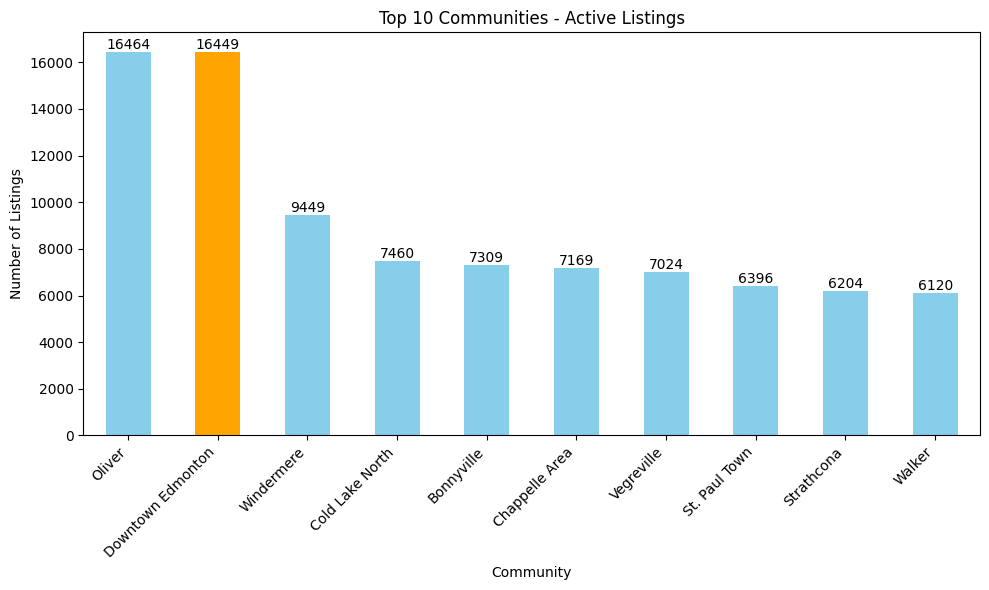

Top 10 Communities in Active dataset (with counts):
  Oliver: 16464 
  Downtown Edmonton: 16449 
  Windermere: 9449 
  Cold Lake North: 7460 
  Bonnyville: 7309 
  Chappelle Area: 7169 
  Vegreville: 7024 
  St. Paul Town: 6396 
  Strathcona: 6204 
  Walker: 6120 

Explanation: The bar chart shows the Top 10 communities by number of listings in the Active dataset. "Downtown Edmonton" is highlighted in orange to indicate highest market activity.



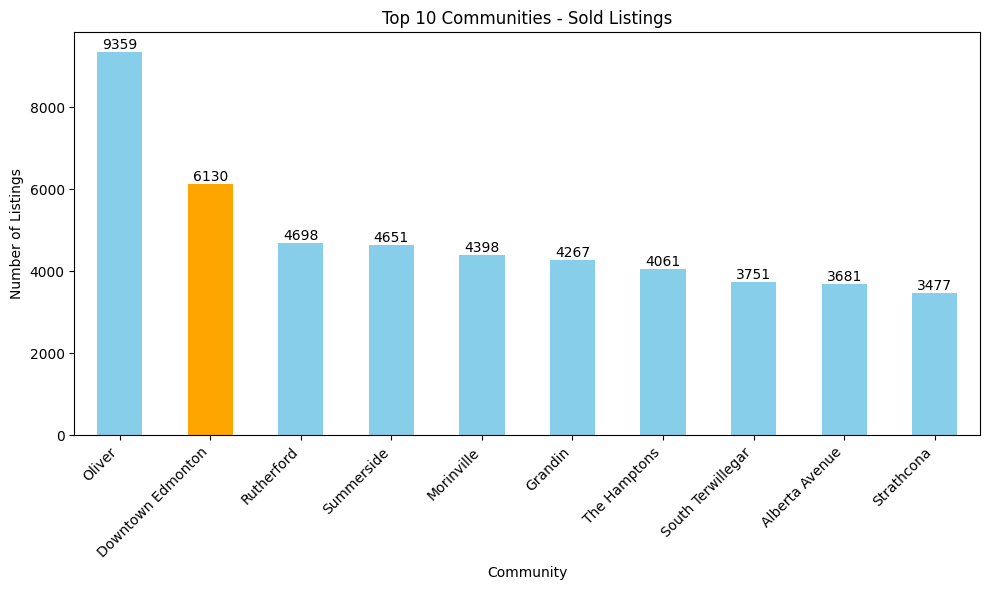

Top 10 Communities in Sold dataset (with counts):
  Oliver: 9359 
  Downtown Edmonton: 6130 
  Rutherford: 4698 
  Summerside: 4651 
  Morinville: 4398 
  Grandin: 4267 
  The Hamptons: 4061 
  South Terwillegar: 3751 
  Alberta Avenue: 3681 
  Strathcona: 3477 

Explanation: The bar chart shows the Top 10 communities by number of listings in the Sold dataset. "Downtown Edmonton" is highlighted in orange to indicate highest market activity.



In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Inline plotting for VS Code / Jupyter
%matplotlib inline

def visualize_top_communities(df, name):
    # Clean community names
    df['Community_clean'] = df['Community'].str.strip()

    # Replace "Downtown" with "Downtown Edmonton" for display
    df['Community_clean'] = df['Community_clean'].replace({'Downtown': 'Downtown Edmonton'})

    # Get top 10 communities
    top_counts = df['Community_clean'].value_counts().head(10)

    # Highlight Downtown Edmonton specifically
    highlight = ['Downtown Edmonton']
    colors = ['orange' if comm in highlight else 'skyblue' for comm in top_counts.index]

    # Plot bar chart
    ax = top_counts.plot(
        kind='bar',
        color=colors,
        title=f"Top 10 Communities - {name} Listings",
        figsize=(10,6)
    )

    plt.xlabel('Community')
    plt.ylabel('Number of Listings')
    plt.xticks(rotation=45, ha='right')

    # Add counts on top of bars
    for i, v in enumerate(top_counts.values):
        ax.text(i, v, str(v), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

    # Print details
    print(f"Top 10 Communities in {name} dataset (with counts):")
    for comm, count in top_counts.items():
        tag = "✅ Highlighted" if comm == 'Downtown Airdrie' else ""
        print(f"  {comm}: {count} {tag}")

    print(
        f'\nExplanation: The bar chart shows the Top 10 communities by number of listings in the {name} dataset. '
        f'"Downtown Edmonton" is highlighted in orange to indicate highest market activity.\n'
    )

# Run for both Active and Sold datasets
visualize_top_communities(active_df, "Active")
visualize_top_communities(sold_df, "Sold")


In [27]:
# -----------------------------
# Step 8: Summary Table of Issues
# -----------------------------
summary_table = pd.DataFrame({
    "Issue": ["Postal Code Issues", "Zero/Negative Price", "Unique Areas/Cities", "Unique Communities"],
    "Active Listings": [active_df['Postal Code_issue'].sum(), len(invalid_price_active),
                        active_df['Area/City'].nunique(), active_df['Community'].nunique()],
    "Sold Listings": [sold_df['Postal Code_issue'].sum(), len(invalid_price_sold),
                      sold_df['Area/City'].nunique(), sold_df['Community'].nunique()]
})
print("Summary Table of Data Issues:")
print(summary_table)
print("\nExplanation: Quick overview showing the main inconsistencies for both datasets. Useful for reporting and cleaning strategy.\n")

Summary Table of Data Issues:
                 Issue  Active Listings  Sold Listings
0   Postal Code Issues                2          26979
1  Zero/Negative Price                0              0
2  Unique Areas/Cities              273            317
3   Unique Communities              961           1068

Explanation: Quick overview showing the main inconsistencies for both datasets. Useful for reporting and cleaning strategy.

